# Data Visualization Techniques, Machine Learning for Business CA2

*Module Title: Data Visualization Techniques, Machine Learning for Business*

*Assessment Title: Data Visualization Techniques, Machine Learning for Business CA2*

*Lecturer Name: David McQuaid, Muhammad Iqbal*

*Student Full Name: Lucas de Sousa Pontes*

*Student Number: 2022085*

*Assessment Due Date: 11/12/2022*

*Date of Submission: 11/12/2022*

Total words: 1131

# Market Basket Analysis

    Retailers often make use of market basket analysis algorithms to uncover associations between customers' purchased items in order to decide which product to place beside each other on the shelves, discount strategies, and more (Lim, 2022). 

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore') 
# Load basket data
df= pd.read_csv("basket.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,whole milk,pastry,salty snack,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sausage,whole milk,semi-finished bread,yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,soda,pickled vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,canned beer,misc. beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sausage,hygiene articles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#Replacing empty value with 0.
df.fillna(0,inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,whole milk,pastry,salty snack,0,0,0,0,0,0,0,0
1,sausage,whole milk,semi-finished bread,yogurt,0,0,0,0,0,0,0
2,soda,pickled vegetables,0,0,0,0,0,0,0,0,0
3,canned beer,misc. beverages,0,0,0,0,0,0,0,0,0
4,sausage,hygiene articles,0,0,0,0,0,0,0,0,0


In [3]:
#Converting data in list format.
transactions = []
for i in range(0,len(df)):
    transactions.append([str(df.values[i,j]) for j in range(0,11) if str(df.values[i,j])!='0'])

transactions[0]

['whole milk', 'pastry', 'salty snack']

    This first step is necessary to transform the data into a format readable by both Apriori and FP Growth Algorithms.

## Apriori Algorithm 

    As one of the prominent algorithms, Apriori selects an item in the dataset and further applies the association rule to the other items present, only extending if the item in the dataset is frequently bought together, but only if it passes a certain set threshold (Lim, 2022). 

In [4]:
from apyori import apriori
#Calling the apriori function .
rules = apriori(transactions,min_support=0.0004,use_colnames = True, max_len = None, verbose = 0, low_memory = False,min_length=2,min_lift=3)
rules

<generator object apriori at 0x0000015C4F944BA0>

In [5]:
Results = list(rules)
Results

[RelationRecord(items=frozenset({'liver loaf', 'fruit/vegetable juice'}), support=0.00040098910646260775, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fruit/vegetable juice'}), items_add=frozenset({'liver loaf'}), confidence=0.011787819253438114, lift=3.52762278978389), OrderedStatistic(items_base=frozenset({'liver loaf'}), items_add=frozenset({'fruit/vegetable juice'}), confidence=0.12, lift=3.5276227897838903)]),
 RelationRecord(items=frozenset({'pickled vegetables', 'ham'}), support=0.0005346521419501437, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ham'}), items_add=frozenset({'pickled vegetables'}), confidence=0.03125, lift=3.4895055970149254), OrderedStatistic(items_base=frozenset({'pickled vegetables'}), items_add=frozenset({'ham'}), confidence=0.05970149253731344, lift=3.4895055970149254)]),
 RelationRecord(items=frozenset({'spread cheese', 'sugar'}), support=0.00040098910646260775, ordered_statistics=[OrderedStatistic(items_base=frozenset({'spread

In [68]:
#Convert result in a dataframe for further operation.
df_results = pd.DataFrame(Results)
# Order statistics itself a list
res_A = df_results.sort_values('support', ascending=[False])
res_A

,items,support,ordered_statistics
1,"(pickled vegetables, ham)",0.000535,"[((ham), (pickled vegetables), 0.03125, 3.4895..."
7,"(sausage, curd, yogurt)",0.000468,"[((sausage), (curd, yogurt), 0.007751937984496..."
0,"(liver loaf, fruit/vegetable juice)",0.000401,"[((fruit/vegetable juice), (liver loaf), 0.011..."
2,"(spread cheese, sugar)",0.000401,"[((spread cheese), (sugar), 0.06, 3.3878490566..."
3,"(sausage, brown bread, canned beer)",0.000401,"[((brown bread), (sausage, canned beer), 0.010..."
4,"(canned beer, whole milk, hygiene articles)",0.000401,"[((canned beer), (whole milk, hygiene articles..."
5,"(chewing gum, soda, yogurt)",0.000401,"[((chewing gum), (soda, yogurt), 0.03333333333..."
6,"(pork, yogurt, citrus fruit)",0.000401,"[((yogurt), (pork, citrus fruit), 0.0046692607..."
8,"(sausage, margarine, yogurt)",0.000401,"[((sausage), (margarine, yogurt), 0.0066445182..."
9,"(pork, sausage, yogurt)",0.000401,"[((yogurt), (pork, sausage), 0.004669260700389..."


    The higher the support value, the more likely the item is to be bought together. Ten items were obtained by selecting a minimum support value of "0.0004" alongside "min_lift=3",  which excludes single-item interactions. 

## FP Growth Algorithm

    As an improved version of the apriori Algorithm, that applies association rule mining in order to achieve the same goal, identify items frequently bought together. Unlike apriori, which requires multiple scans of the dataset, turning the analysis into an extensive task for large datasets, FP Growth Algorithm will cost less computing power by storing the information in a tree-like structure created by scanning the data only two times. The so-called FP-tree act on a conditional approach mining frequent item sets by a dividing-and-conquer method (Andrewngai, 2020).

In [7]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
from mlxtend.frequent_patterns import fpgrowth

frequent_itemsets = fpgrowth(df, min_support=0.01, use_colnames=True)
print(frequent_itemsets)
print(frequent_itemsets.shape)

     support                        itemsets
0   0.157923                    (whole milk)
1   0.051728                        (pastry)
2   0.018780                   (salty snack)
3   0.085879                        (yogurt)
4   0.060349                       (sausage)
..       ...                             ...
64  0.011161            (whole milk, yogurt)
65  0.011629              (soda, whole milk)
66  0.013968        (rolls/buns, whole milk)
67  0.010559  (other vegetables, rolls/buns)
68  0.014837  (other vegetables, whole milk)

[69 rows x 2 columns]
(69, 2)


In [67]:
# Compute the association rules based on the frequent itemsets
from mlxtend.frequent_patterns import association_rules

#Compute and print the association rules
res_FP = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.05)
res_FP

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638
1,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861
2,(soda),(whole milk),0.097106,0.157923,0.011629,0.119752,0.758296,-0.003707,0.956636
3,(whole milk),(soda),0.157923,0.097106,0.011629,0.073635,0.758296,-0.003707,0.974663
4,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550
5,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350
6,(other vegetables),(rolls/buns),0.122101,0.110005,0.010559,0.086481,0.786154,-0.002872,0.974249
7,(rolls/buns),(other vegetables),0.110005,0.122101,0.010559,0.095990,0.786154,-0.002872,0.971117
8,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,-0.004446,0.958551
9,(whole milk),(other vegetables),0.157923,0.122101,0.014837,0.093948,0.769430,-0.004446,0.968928


    The FP Growth Algorithm with set minimum support of 0.01 resulted in ten interactions obtained by the association rule. 

## Results comparison

In [10]:
import time
l= np.arange(0.0001, 0.1, 0.0001)
t=[]
for i in l:
    t1=time.time()
    apriori(df,min_support=i,use_colnames=True)
    t2=time.time()
    t.append((t2-t1)*1000)

In [11]:
l= np.arange(0.0001, 0.1, 0.0001)
f=[]
for i in l:
    t1=time.time()
    fpgrowth(df,min_support=i,use_colnames=True)
    t2=time.time()
    f.append((t2-t1)*1000)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\ProgramData\Anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


Text(0, 0.5, 'Run Time in ms')

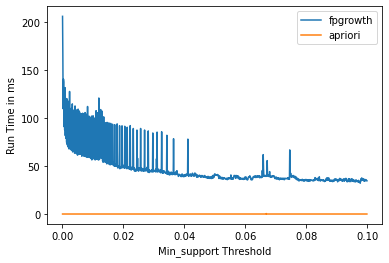

In [12]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.lineplot(x=l,y=f,label="fpgrowth")
sns.lineplot(x=l,y=t,label="apriori")
plt.xlabel("Min_support Threshold")
plt.ylabel("Run Time in ms")

    The line plot displays that the FP growth is clearly more computationally demanding than the apriori algorithm. 

In [69]:
res_A

,items,support,ordered_statistics
1,"(pickled vegetables, ham)",0.000535,"[((ham), (pickled vegetables), 0.03125, 3.4895..."
7,"(sausage, curd, yogurt)",0.000468,"[((sausage), (curd, yogurt), 0.007751937984496..."
0,"(liver loaf, fruit/vegetable juice)",0.000401,"[((fruit/vegetable juice), (liver loaf), 0.011..."
2,"(spread cheese, sugar)",0.000401,"[((spread cheese), (sugar), 0.06, 3.3878490566..."
3,"(sausage, brown bread, canned beer)",0.000401,"[((brown bread), (sausage, canned beer), 0.010..."
4,"(canned beer, whole milk, hygiene articles)",0.000401,"[((canned beer), (whole milk, hygiene articles..."
5,"(chewing gum, soda, yogurt)",0.000401,"[((chewing gum), (soda, yogurt), 0.03333333333..."
6,"(pork, yogurt, citrus fruit)",0.000401,"[((yogurt), (pork, citrus fruit), 0.0046692607..."
8,"(sausage, margarine, yogurt)",0.000401,"[((sausage), (margarine, yogurt), 0.0066445182..."
9,"(pork, sausage, yogurt)",0.000401,"[((yogurt), (pork, sausage), 0.004669260700389..."


   The resulting Apriori analysis shows some expected and also unexpected correlations between certain items. Pork, yoghurt and citrus fruits don't seem to have an obvious correlation, however, ham and pickled vegetables seem to be an expected correlation, which is also the one with the highest score.

In [70]:
res_FP

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638
1,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861
2,(soda),(whole milk),0.097106,0.157923,0.011629,0.119752,0.758296,-0.003707,0.956636
3,(whole milk),(soda),0.157923,0.097106,0.011629,0.073635,0.758296,-0.003707,0.974663
4,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550
5,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350
6,(other vegetables),(rolls/buns),0.122101,0.110005,0.010559,0.086481,0.786154,-0.002872,0.974249
7,(rolls/buns),(other vegetables),0.110005,0.122101,0.010559,0.095990,0.786154,-0.002872,0.971117
8,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,-0.004446,0.958551
9,(whole milk),(other vegetables),0.157923,0.122101,0.014837,0.093948,0.769430,-0.004446,0.968928


        The more robust analysis made by the FP algorithm found lots of associations involving whole milk, none of those correlations was found in the Apriori method. All refers to the most common items bought daily in supermarkets, like buns, vegetables and soda. The minimum confidence score restricts the result to only the most trustful associations found.

# Reccomendation System

    Recommendation algorithms are widely used by dominant companies in the information technology industry and are considered one of the most necessary tools, in order to provide users with suggestions of products, friends, and other interests. These systems calculate preferences or ratings that are given by data mining obtained from data mining the data created by other users based on their interests, like purchase history (Mansur, Patel and Patel, 2017).

## First attempt (failed)

In [13]:
data = pd.read_csv("cuisines.csv")
print(data.shape)
print(data.name.nunique())

(4236, 9)
4226


In [14]:
data = data.dropna(axis=0)
print(data.shape)
print(data.name.nunique())

(4179, 9)
4169


In [15]:
data.head()

,name,image_url,description,cuisine,course,diet,prep_time,ingredients,instructions
0,Thayir Semiya Recipe (Curd Semiya),https://www.archanaskitchen.com/images/archana...,Thayir Semiya or Curd Vermicelli is a quick di...,Indian,Lunch,Vegetarian,Total in 35 M,\n\n\t\t\t\t\t\t\t \t\t1/2 cup Semiya (Vermice...,"To begin making the Thayir Semiya recipe, firs..."
1,Chettinad Style Kara Kuzhambu Recipe with Pota...,https://www.archanaskitchen.com/images/archana...,Chettinad Style Kara Kuzhambu Recipe with Pot...,South Indian Recipes,Lunch,Vegetarian,Total in 75 M,\nFor ground masala\n\n\t\t\t\t\t\t\t \t\t1/4 ...,To begin making the Chettinad Style Kara Kuzha...
2,Goan Chana Ros Recipe (White Peas Curry),https://www.archanaskitchen.com/images/archana...,Goan Chana Ros is a vegetarian dish from Goan ...,Goan Recipes,Lunch,Vegetarian,Total in 530 M,\n\n\t\t\t\t\t\t\t \t\t1/2 cup Dried Green Pea...,"To prepare Goan Chana Ros recipe, soak the whi..."
3,Minced Meat And Egg Croquettes Recipe,https://www.archanaskitchen.com/images/archana...,The croquette is usually cigar shaped or cylin...,North Indian Recipes,Appetizer,Non Vegeterian,Total in 55 M,\n\n\t\t\t\t\t\t\t \t\t500 grams Mutton\t\t\t\...,To begin making the Minced Meat And Egg Croque...
4,Thekera Tenga Recipe,https://www.archanaskitchen.com/images/archana...,Thekera Tenga is a Sour curry from Assamese cu...,Assamese,Dinner,Vegetarian,Total in 30 M,\n\n\t\t\t\t\t\t\t \t\t4 Potatoes (Aloo)\t\t\t...,"To begin making the Thekera Tenga recipe, Heat..."


In [16]:
# remove space around name
data.name = data.name.str.strip()

# convert name into lower case
data.name = data.name.str.lower()
data.name.nunique()

4169

In [17]:
data['prep_time'] = data['prep_time'].str.extract('(\d+)', expand=False)

<>:1: DeprecationWarning: invalid escape sequence \d
<>:1: DeprecationWarning: invalid escape sequence \d
C:\Users\Lucas\AppData\Local\Temp\ipykernel_44672\3252642519.py:1: DeprecationWarning: invalid escape sequence \d
  data['prep_time'] = data['prep_time'].str.extract('(\d+)', expand=False)


In [18]:
data['prep_time'] = data['prep_time'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4179 entries, 0 to 4235
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          4179 non-null   object
 1   image_url     4179 non-null   object
 2   description   4179 non-null   object
 3   cuisine       4179 non-null   object
 4   course        4179 non-null   object
 5   diet          4179 non-null   object
 6   prep_time     4179 non-null   int32 
 7   ingredients   4179 non-null   object
 8   instructions  4179 non-null   object
dtypes: int32(1), object(8)
memory usage: 310.2+ KB


In [19]:
data.cuisine.value_counts()

North Indian Recipes         817
Indian                       802
South Indian Recipes         626
Bengali Recipes              163
Kerala Recipes               159
Tamil Nadu                   158
Maharashtrian Recipes        136
Karnataka                    132
Gujarati Recipes﻿            124
Rajasthani                   116
Andhra                       116
Punjabi                       85
Goan Recipes                  83
Chettinad                     67
Kashmiri                      58
Mangalorean                   44
Awadhi                        36
Parsi Recipes                 35
Sindhi                        32
Mughlai                       31
Konkan                        31
Oriya Recipes                 29
Hyderabadi                    27
Assamese                      26
Bihari                        22
North East India Recipes      20
Himachal                      17
Fusion                        16
Coorg                         15
Coastal Karnataka             14
North Karn

In [20]:
data = data.loc[data['cuisine'].isin(["North Indian Recipes" , "South Indian Recipes" , "Indian" ])]
data.cuisine.value_counts()

North Indian Recipes    817
Indian                  802
South Indian Recipes    626
Name: cuisine, dtype: int64

In [21]:
data.cuisine.value_counts()

North Indian Recipes    817
Indian                  802
South Indian Recipes    626
Name: cuisine, dtype: int64

In [22]:
data.course.value_counts()

Lunch                     832
Side Dish                 463
Dinner                    238
Dessert                   230
South Indian Breakfast    168
Main Course                82
North Indian Breakfast     80
Appetizer                  60
Indian Breakfast           52
Snack                      28
One Pot Dish                7
World Breakfast             5
Name: course, dtype: int64

In [23]:
data = data.loc[data['course'].isin(["Lunch" , "Dinner" , "Dessert","Side Dish" ])]
data.course.value_counts()

Lunch        832
Side Dish    463
Dinner       238
Dessert      230
Name: course, dtype: int64

In [24]:
data.diet.value_counts()

Vegetarian                      1237
High Protein Vegetarian          245
Diabetic Friendly                 91
Non Vegeterian                    69
No Onion No Garlic (Sattvic)      35
High Protein Non Vegetarian       34
Eggetarian                        30
Vegan                             13
Gluten Free                        9
Name: diet, dtype: int64

In [25]:
data[data.duplicated()]

,name,image_url,description,cuisine,course,diet,prep_time,ingredients,instructions
72,raw mango puliyogare gojju recipe with peanuts,https://www.archanaskitchen.com/images/archana...,Puliyogare Gojju is a famous recipe from the s...,South Indian Recipes,Lunch,Vegetarian,35,\n\n\t\t\t\t\t\t\t \t\t1 Mango (Raw)\t\t\t\t\t...,To begin making Raw Mango Puliyogare Gojju Rec...
790,bhindi masala recipe - bhindi tamatar ki sabzi,https://www.archanaskitchen.com/images/archana...,The Bhindi Masala Recipe is a simple and quick...,North Indian Recipes,Side Dish,Vegetarian,35,\n\n\t\t\t\t\t\t\t \t\t400 grams Bhindi (Lady ...,"To begin making the Bhindi Masala Recipe, firs..."
831,thayir semiya recipe (curd semiya),https://www.archanaskitchen.com/images/archana...,Thayir Semiya or Curd Vermicelli is a quick di...,Indian,Lunch,Vegetarian,35,\n\n\t\t\t\t\t\t\t \t\t1/2 cup Semiya (Vermice...,"To begin making the Thayir Semiya recipe, firs..."
3720,bhindi masala gravy recipe - ladies finger in ...,https://www.archanaskitchen.com/images/archana...,Bhindi Masala is a simple gravy recipe in whic...,North Indian Recipes,Side Dish,Vegetarian,50,\n\n\t\t\t\t\t\t\t \t\t250 grams Bhindi (Lady ...,To begin making the Bhindi Masala Gravy Recipe...


In [26]:
data = data.drop_duplicates()
print(data.shape)
print(data.name.nunique())

(1759, 9)
1759


In [27]:
# Convert all ingredients into lower case for preventing case sensitive
data.ingredients = data.ingredients.str.lower()

ingredients = data["ingredients"]
ingredients

0       \n\n\t\t\t\t\t\t\t \t\t1/2 cup semiya (vermice...
1       \nfor ground masala\n\n\t\t\t\t\t\t\t \t\t1/4 ...
5       \n\n\t\t\t\t\t\t\t \t\t2 cups cooked rice \n\n...
11      \n\n\t\t\t\t\t\t\t \t\t1 cup black urad dal (w...
15      \n\n\t\t\t\t\t\t\t \t\t1 cup baby potatoes \n\...
                              ...                        
4219    \n\n\t\t\t\t\t\t\t \t\t250 ग्राम्स कटहल \n\nसर...
4224    \n\n\t\t\t\t\t\t\t \t\t2 कटोरी अंकुरित दाल  \n...
4230    \n\n\t\t\t\t\t\t\t \t\t1 cup coriander (dhania...
4233    \n\n\t\t\t\t\t\t\t \t\t1 kaddu (parangikai/ pu...
4234    \n\n\t\t\t\t\t\t\t \t\t3 cups cabbage (patta g...
Name: ingredients, Length: 1759, dtype: object

In [28]:
import re
res = []
for sub in ingredients:
    res.append(re.sub("\n|\t",'', sub))       

In [29]:
res

[' 1/2 cup semiya (vermicelli) , roasted  1 cup curd (dahi / yogurt) for tempering 1 teaspoon mustard seeds (rai/ kadugu)  1/2 teaspoon white urad dal (split)  pinch asafoetida (hing)  1 sprig curry leaves  2 teaspoon oil raw peanuts (moongphali)  1 sprig curry leaves  2 teaspoon oil  5 to 6 cashew nuts , for garnishing ',
 'for ground masala 1/4 teaspoon methi seeds (fenugreek seeds)  2 teaspoons coriander (dhania) seeds  1 teaspoon fennel seeds (saunf)  2 dry red chillies  1/4 cup fresh coconut , grated for the kuzhambu 1/2 cup pearl onions (sambar onions) , quartered  5 cloves garlic , finely chopped  2 tomatoes , finely chopped  2 potatoes (aloo) , cut into medium sized pieces  2 brinjal (baingan / eggplant) , cut into wedges  1 tablespoon jaggery  1 cup tamarind water  1 teaspoon sambar powder for seasoning 1 teaspoon gingelly oil  1/2 teaspoon mustard seeds (rai/ kadugu)  2 sprig curry leaves ',
 ' 2 cups cooked rice ghee , or oil as required  1 teaspoon cumin seeds (jeera)  1 on

In [30]:
ingredients = pd.Series(res)

ingredients = ingredients.str.strip()
cleaned_ingredients = []
for i in ingredients.str.split(","): 
    cleaned_ingredients += i

In [31]:
final_ingredients = pd.Series(cleaned_ingredients)

final_ingredients = final_ingredients.str.strip()

final_ingredients = final_ingredients.value_counts().reset_index()
final_ingredients.columns = ["ingredients", "count"]
final_ingredients

,ingredients,count
0,to taste,240
1,स्वाद अनुसार,123
2,प्रयोग अनुसार,77
3,chopped,73
4,as required,69
...,...,...
8144,to taste ingredients for seasoning 1 teaspoon ...,1
8145,or vegetable oil salt,1
8146,(optional) 1/4 teaspoon turmeric powder (hald...,1
8147,roughly chopped 1/2 cup pearl onions (sambar ...,1


    Unfortunately, the attempted dataset contains too much noise in the ingredient column, being mixed with cooking instructions, including some in different alphabets. Manually fixing the 8149 rows is impractical, taking that into consideration, another similar dataset was chosen to continue with the Indian food recommendation system.

## Second attempt

In [32]:
data = pd.read_csv("indian_food.csv")
print(data.shape)
print(data.name.nunique())

(255, 9)
255


In [33]:
data = data.dropna(axis=0)
print(data.shape)
data.head()

(254, 9)


,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [34]:
data.diet.value_counts()

vegetarian        225
non vegetarian     29
Name: diet, dtype: int64

In [35]:
data.flavor_profile.value_counts()

spicy     133
sweet      87
-1         29
bitter      4
sour        1
Name: flavor_profile, dtype: int64

In [36]:
data.course.value_counts()

main course    129
dessert         84
snack           39
starter          2
Name: course, dtype: int64

In [37]:
data.region.value_counts()

West          74
South         59
North         49
East          31
North East    25
-1            13
Central        3
Name: region, dtype: int64

In [38]:
data.state.value_counts()

Gujarat            35
Punjab             32
Maharashtra        30
West Bengal        24
-1                 24
Assam              21
Tamil Nadu         20
Andhra Pradesh     10
Kerala              8
Uttar Pradesh       8
Odisha              7
Karnataka           6
Rajasthan           6
Telangana           5
Bihar               3
Goa                 3
Manipur             2
Jammu & Kashmir     2
Madhya Pradesh      2
Uttarakhand         1
Tripura             1
Nagaland            1
NCT of Delhi        1
Chhattisgarh        1
Haryana             1
Name: state, dtype: int64

    Similar to the first attempt dataset, the "Indian_food" dataset describes different Indian recipes by course, diet, flavour, origin region and state. All this can be visualised using graphs and dashboards.

### Data Visualisation

In [40]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
print("Search for your desired food recipe here")
@interact
def show_articles_more_than(Name =''):
    return data[data['name'].str.contains(Name)]


Search for your desired food recipe here


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\pylab\backend_inline.py:11: DeprecationWarning: `ipykernel.pylab.backend_inline` is deprecated, directly use `matplotlib_inline.backend_inline`
  warnings.warn(


interactive(children=(Text(value='', description='Name'), Output()), _dom_classes=('widget-interact',))

    The search mechanism above can be used to look for recipe ingredients, diet type, flavour and more. To do that the user just has to search for the recipe name in the toolbox. 

In [41]:
@interact
def show_Restaurants_according_to_search(Diet= data['diet'].unique(),
                                         Course= data['course'].unique(),
                                         Flavor= data['flavor_profile'].unique(),
                            Maximum_Preparation_time=(-1,120,1),
                            Maximum_Cooking_time=(-1,120,1)):
    print("")
    return data[ (data['prep_time'] <= Maximum_Preparation_time) 
                &(data['diet'] == Diet) 
                &(data['course'] == Course)
                &(data['flavor_profile'] == Flavor)
                & (data['cook_time'] <= Maximum_Cooking_time)]

interactive(children=(Dropdown(description='Diet', options=('vegetarian', 'non vegetarian'), value='vegetarian…

    Following a simple and straightforward interface, the tool above allows the user to select a recipe by its interest, selecting the desirable flavour, which diet the user follows and the maximum amount of time to expend by preparing and cooking. Just like the last tool, this one was made to have a simple design without abbreviations and using a simple and big text font. The description of each function helps individuals without expertise in the subject, or technology in general, to follow a straightforward layout that minimizes human error.

In [78]:
from bokeh.plotting import figure, show
from bokeh.transform import factor_cmap, factor_mark
from bokeh.models import Range1d
from bokeh.plotting import ColumnDataSource, output_file
import bokeh.io

diet = sorted(data['diet'].unique())
MARKERS = ['hex','triangle']

source = ColumnDataSource(data= data)

p = figure(title = "Cooking and preparation time correlation", background_fill_color="#fafafa")
p.xaxis.axis_label = 'Cooking time (minutes)'
p.yaxis.axis_label = 'Preparation time (minutes)'

p.scatter("cook_time", "prep_time", source=source,
          legend_group="diet", fill_alpha=0.4, size=13, line_alpha=0.8,
          marker=factor_mark('diet', MARKERS, diet),
          color=factor_cmap('diet', 'Category10_3', diet))

p.x_range = Range1d(-1, 155)
p.y_range = Range1d(-1, 155)
p.title.text_font_size = '18pt'
p.legend.location = "top_right"
p.legend.title = "Diet"
p.xaxis.axis_label_text_font_size = "15pt"
p.yaxis.axis_label_text_font_size = "15pt"
p.legend.label_text_font_size = '15pt'
bokeh.io.output_notebook()
show(p)

C:\ProgramData\Anaconda3\lib\site-packages\bokeh\io\notebook.py:487: DeprecationWarning: The `source` parameter emit a  deprecation warning since IPython 8.0, it had no effects for a long time and will  be removed in future versions.
  publish_display_data(data, metadata, source, transient=transient, **kwargs)


Loading BokehJS ...

C:\ProgramData\Anaconda3\lib\site-packages\bokeh\io\notebook.py:487: DeprecationWarning: The `source` parameter emit a  deprecation warning since IPython 8.0, it had no effects for a long time and will  be removed in future versions.
  publish_display_data(data, metadata, source, transient=transient, **kwargs)


C:\ProgramData\Anaconda3\lib\site-packages\bokeh\io\notebook.py:487: DeprecationWarning: The `source` parameter emit a  deprecation warning since IPython 8.0, it had no effects for a long time and will  be removed in future versions.
  publish_display_data(data, metadata, source, transient=transient, **kwargs)


C:\ProgramData\Anaconda3\lib\site-packages\bokeh\io\notebook.py:487: DeprecationWarning: The `source` parameter emit a  deprecation warning since IPython 8.0, it had no effects for a long time and will  be removed in future versions.
  publish_display_data(data, metadata, source, transient=transient, **kwargs)


        The scatter plot above allows the user to observe the correlation between the preparation and cooking time for different diets, vegetarian and non-vegetarian. The interactive interface allows the user to move the axis and focus on data points of its interest, which also allows the user to observe all outliers. The clear legends, with data points represented by both colour and shape, summed into a big and simple font help older adults to keep interested and interpret the results as they should.

### Feature engineering

    Prior to the modelling, the data has to be modified and one-hot encoded in order to have the ideal format and ensure that all columns have a similar impact on the final results. 

In [43]:
# Convert all ingredients into lower case for preventing case sensitive
data.ingredients = data.ingredients.str.lower()


ingredients = data["ingredients"]

ingredients

0                        maida flour, yogurt, oil, sugar
1                                gram flour, ghee, sugar
2           carrots, milk, sugar, ghee, cashews, raisins
3      flour, ghee, kewra, milk, clarified butter, su...
4      milk powder, plain flour, baking powder, ghee,...
                             ...                        
250              glutinous rice, black sesame seeds, gur
251    coconut milk, egg yolks, clarified butter, all...
252    cottage cheese, dry dates, dried rose petals, ...
253    milk powder, dry fruits, arrowroot powder, all...
254    brown rice, fennel seeds, grated coconut, blac...
Name: ingredients, Length: 254, dtype: object

In [44]:
ingredients = ingredients.str.strip()
cleaned_ingredients = []
for i in ingredients.str.split(","): 
    cleaned_ingredients += i

In [45]:

final_ingredients = pd.Series(cleaned_ingredients)

final_ingredients = final_ingredients.str.strip()

final_ingredients = final_ingredients.value_counts().reset_index()
final_ingredients.columns = ["ingredients", "count"]
final_ingredients

,ingredients,count
0,sugar,48
1,ginger,29
2,garam masala,27
3,curry leaves,25
4,ghee,25
...,...,...
358,sattu,1
359,atta,1
360,filling,1
361,white bread slices,1


In [46]:
final_ingredients.ingredients.nunique()

363

In [47]:
for i in final_ingredients.ingredients:
    data[i] = 0 # here i create a column of particular ingredients and assign all value as 0
    data.loc[data.ingredients.str.contains(i), [i]] = 1
    # above i put 1 on that column which dishes has include that particular ingredients
    
data.tail(8)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,sugar,...,kala chana,mashed potato,boondi,chopped tomatoes,tea bags,sattu,atta,filling,white bread slices,ginger powder
247,Prawn malai curry,"coconut milk, prawns, garlic, turmeric, sugar",non vegetarian,15,50,spicy,main course,West Bengal,East,1,...,0,0,0,0,0,0,0,0,0,0
248,Red Rice,"red pepper, red onion, butter, watercress, oli...",vegetarian,-1,-1,-1,main course,-1,-1,0,...,0,0,0,0,0,0,0,0,0,0
249,Shukto,"green beans, bitter gourd, ridge gourd, banana...",vegetarian,10,20,spicy,main course,West Bengal,East,0,...,0,0,0,0,0,0,0,0,0,0
250,Til Pitha,"glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East,0,...,0,0,0,0,0,0,0,0,0,0
251,Bebinca,"coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West,0,...,0,0,0,0,0,0,0,0,0,0
252,Shufta,"cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North,0,...,0,0,0,0,0,0,0,0,0,0
253,Mawa Bati,"milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central,0,...,0,0,0,0,0,0,0,0,0,0
254,Pinaca,"brown rice, fennel seeds, grated coconut, blac...",vegetarian,-1,-1,sweet,dessert,Goa,West,0,...,0,0,0,0,0,0,0,0,0,1


In [48]:
diet_encoding = pd.get_dummies(data.diet, drop_first=True)
diet_encoding.head()

,vegetarian
0,1
1,1
2,1
3,1
4,1


In [49]:
data = pd.concat([data, diet_encoding], axis = 1)
data.tail(8)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,sugar,...,mashed potato,boondi,chopped tomatoes,tea bags,sattu,atta,filling,white bread slices,ginger powder,vegetarian
247,Prawn malai curry,"coconut milk, prawns, garlic, turmeric, sugar",non vegetarian,15,50,spicy,main course,West Bengal,East,1,...,0,0,0,0,0,0,0,0,0,0
248,Red Rice,"red pepper, red onion, butter, watercress, oli...",vegetarian,-1,-1,-1,main course,-1,-1,0,...,0,0,0,0,0,0,0,0,0,1
249,Shukto,"green beans, bitter gourd, ridge gourd, banana...",vegetarian,10,20,spicy,main course,West Bengal,East,0,...,0,0,0,0,0,0,0,0,0,1
250,Til Pitha,"glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East,0,...,0,0,0,0,0,0,0,0,0,1
251,Bebinca,"coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West,0,...,0,0,0,0,0,0,0,0,0,1
252,Shufta,"cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North,0,...,0,0,0,0,0,0,0,0,0,1
253,Mawa Bati,"milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central,0,...,0,0,0,0,0,0,0,0,0,1
254,Pinaca,"brown rice, fennel seeds, grated coconut, blac...",vegetarian,-1,-1,sweet,dessert,Goa,West,0,...,0,0,0,0,0,0,0,0,1,1


In [50]:
flavor_profile_encoding = pd.get_dummies(data.flavor_profile, drop_first=True)
flavor_profile_encoding.tail(8)

,bitter,sour,spicy,sweet
247,0,0,1,0
248,0,0,0,0
249,0,0,1,0
250,0,0,0,1
251,0,0,0,1
252,0,0,0,1
253,0,0,0,1
254,0,0,0,1


In [51]:
data = pd.concat([data, flavor_profile_encoding], axis = 1)
data.tail(8)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,sugar,...,sattu,atta,filling,white bread slices,ginger powder,vegetarian,bitter,sour,spicy,sweet
247,Prawn malai curry,"coconut milk, prawns, garlic, turmeric, sugar",non vegetarian,15,50,spicy,main course,West Bengal,East,1,...,0,0,0,0,0,0,0,0,1,0
248,Red Rice,"red pepper, red onion, butter, watercress, oli...",vegetarian,-1,-1,-1,main course,-1,-1,0,...,0,0,0,0,0,1,0,0,0,0
249,Shukto,"green beans, bitter gourd, ridge gourd, banana...",vegetarian,10,20,spicy,main course,West Bengal,East,0,...,0,0,0,0,0,1,0,0,1,0
250,Til Pitha,"glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East,0,...,0,0,0,0,0,1,0,0,0,1
251,Bebinca,"coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West,0,...,0,0,0,0,0,1,0,0,0,1
252,Shufta,"cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North,0,...,0,0,0,0,0,1,0,0,0,1
253,Mawa Bati,"milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central,0,...,0,0,0,0,0,1,0,0,0,1
254,Pinaca,"brown rice, fennel seeds, grated coconut, blac...",vegetarian,-1,-1,sweet,dessert,Goa,West,0,...,0,0,0,0,1,1,0,0,0,1


In [52]:
course_encoding = pd.get_dummies(data.course, drop_first = True)
course_encoding.tail(8)

,main course,snack,starter
247,1,0,0
248,1,0,0
249,1,0,0
250,0,0,0
251,0,0,0
252,0,0,0
253,0,0,0
254,0,0,0


In [53]:
data = pd.concat([data, course_encoding], axis = 1)
data.tail(8)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,sugar,...,white bread slices,ginger powder,vegetarian,bitter,sour,spicy,sweet,main course,snack,starter
247,Prawn malai curry,"coconut milk, prawns, garlic, turmeric, sugar",non vegetarian,15,50,spicy,main course,West Bengal,East,1,...,0,0,0,0,0,1,0,1,0,0
248,Red Rice,"red pepper, red onion, butter, watercress, oli...",vegetarian,-1,-1,-1,main course,-1,-1,0,...,0,0,1,0,0,0,0,1,0,0
249,Shukto,"green beans, bitter gourd, ridge gourd, banana...",vegetarian,10,20,spicy,main course,West Bengal,East,0,...,0,0,1,0,0,1,0,1,0,0
250,Til Pitha,"glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East,0,...,0,0,1,0,0,0,1,0,0,0
251,Bebinca,"coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West,0,...,0,0,1,0,0,0,1,0,0,0
252,Shufta,"cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North,0,...,0,0,1,0,0,0,1,0,0,0
253,Mawa Bati,"milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central,0,...,0,0,1,0,0,0,1,0,0,0
254,Pinaca,"brown rice, fennel seeds, grated coconut, blac...",vegetarian,-1,-1,sweet,dessert,Goa,West,0,...,0,1,1,0,0,0,1,0,0,0


In [54]:
state_encoding = pd.get_dummies(data.state, drop_first = True)
state_encoding.tail(8)

,Andhra Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Jammu & Kashmir,Karnataka,Kerala,...,Nagaland,Odisha,Punjab,Rajasthan,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
249,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
250,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
251,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
252,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
253,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
254,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
data = pd.concat([data, state_encoding], axis = 1)
data.tail(8)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,sugar,...,Nagaland,Odisha,Punjab,Rajasthan,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
247,Prawn malai curry,"coconut milk, prawns, garlic, turmeric, sugar",non vegetarian,15,50,spicy,main course,West Bengal,East,1,...,0,0,0,0,0,0,0,0,0,1
248,Red Rice,"red pepper, red onion, butter, watercress, oli...",vegetarian,-1,-1,-1,main course,-1,-1,0,...,0,0,0,0,0,0,0,0,0,0
249,Shukto,"green beans, bitter gourd, ridge gourd, banana...",vegetarian,10,20,spicy,main course,West Bengal,East,0,...,0,0,0,0,0,0,0,0,0,1
250,Til Pitha,"glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East,0,...,0,0,0,0,0,0,0,0,0,0
251,Bebinca,"coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West,0,...,0,0,0,0,0,0,0,0,0,0
252,Shufta,"cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North,0,...,0,0,0,0,0,0,0,0,0,0
253,Mawa Bati,"milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central,0,...,0,0,0,0,0,0,0,0,0,0
254,Pinaca,"brown rice, fennel seeds, grated coconut, blac...",vegetarian,-1,-1,sweet,dessert,Goa,West,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
region_encoding = pd.get_dummies(data.region, drop_first = True)
region_encoding.tail(8)

,Central,East,North,North East,South,West
247,0,1,0,0,0,0
248,0,0,0,0,0,0
249,0,1,0,0,0,0
250,0,0,0,1,0,0
251,0,0,0,0,0,1
252,0,0,1,0,0,0
253,1,0,0,0,0,0
254,0,0,0,0,0,1


In [57]:
data = pd.concat([data, region_encoding], axis = 1)
data.head(8)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,sugar,...,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,Central,East,North,North East,South,West
0,Balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,1,...,0,0,0,1,0,1,0,0,0,0
1,Boondi,"gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,1,...,0,0,0,0,0,0,0,0,0,1
2,Gajar ka halwa,"carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North,1,...,0,0,0,0,0,0,1,0,0,0
3,Ghevar,"flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West,1,...,0,0,0,0,0,0,0,0,0,1
4,Gulab jamun,"milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East,1,...,0,0,0,1,0,1,0,0,0,0
5,Imarti,"sugar syrup, lentil flour",vegetarian,10,50,sweet,dessert,West Bengal,East,1,...,0,0,0,1,0,1,0,0,0,0
6,Jalebi,"maida, corn flour, baking soda, vinegar, curd,...",vegetarian,10,50,sweet,dessert,Uttar Pradesh,North,0,...,0,1,0,0,0,0,1,0,0,0
7,Kaju katli,"cashews, ghee, cardamom, sugar",vegetarian,10,20,sweet,dessert,-1,-1,1,...,0,0,0,0,0,0,0,0,0,0


In [58]:
final_data = data.drop(columns = ['ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'])

final_data.head()

,name,sugar,ginger,garam masala,curry leaves,ghee,urad dal,jaggery,rice flour,milk,...,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,Central,East,North,North East,South,West
0,Balu shahi,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,Boondi,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Gajar ka halwa,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,Ghevar,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,Gulab jamun,1,0,0,0,1,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0


In [59]:
final_data.set_index("name", inplace = True)
final_data.head()

,sugar,ginger,garam masala,curry leaves,ghee,urad dal,jaggery,rice flour,milk,chana dal,...,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,Central,East,North,North East,South,West
name,,,,,,,,,,,,,,,,,,,,,
Balu shahi,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
Boondi,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Gajar ka halwa,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
Ghevar,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
Gulab jamun,1,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0


## Modeling

        The unsupervised method KNN is still one of the prominent algorithms for clustering that can also be applied in recommendation systems, it operates by calculating the distance between the test observation from the other observations in the dataset (Gokte, 2022).

In [60]:
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(metric = "cosine", algorithm = "brute")
model.fit(final_data)

NearestNeighbors(algorithm='brute', metric='cosine')

    The cosine metric applied on the KNN algorithm refers to the cosine distance, obtained by a formula used to calculate the similarity between two vectors, the obtained value 0 to 1 represents the similarity between the vectors, 0 depicting that there is no difference between them, and increase as the dissimilarity also increase (Gokte, 2022).

In [61]:
picked_cuisine = final_data.index[np.random.choice(final_data.shape[0])]
picked_cuisine

'Obbattu holige'

In [62]:
distance, cuisine_index = model.kneighbors(final_data[final_data.index == picked_cuisine], n_neighbors = 11)
distance

array([[2.22044605e-16, 4.83602221e-01, 4.83602221e-01, 4.83602221e-01,
        5.10102051e-01, 5.10102051e-01, 5.43564535e-01, 5.69668517e-01,
        5.78362979e-01, 5.78362979e-01, 5.85960664e-01]])

In [63]:
cuisine_index

array([[46, 54, 37, 45, 61, 53, 49, 60, 10,  7,  6]], dtype=int64)

In [64]:
distance = distance.flatten()
cuisine_index = cuisine_index.flatten()

print("Recommendation for ", picked_cuisine, " are following")

count = 1
for i in range(cuisine_index.size):
    if final_data.index[cuisine_index[i]] == picked_cuisine:
        continue
    print(count, ". ", final_data.index[cuisine_index[i]], " with distance ", distance[i])
    count += 1

Recommendation for  Obbattu holige  are following
1 .  Kajjikaya  with distance  0.4836022205056778
2 .  Ariselu  with distance  0.4836022205056778
3 .  Mysore pak  with distance  0.4836022205056779
4 .  Shankarpali  with distance  0.5101020514433645
5 .  Unni Appam  with distance  0.5101020514433645
6 .  Pongal  with distance  0.5435645354123617
7 .  Modak  with distance  0.5696685170880649
8 .  Laddu  with distance  0.5783629786442162
9 .  Kaju katli  with distance  0.5783629786442162
10 .  Jalebi  with distance  0.5859606643945874


        By picking a cuisine item, "Obbattu holige" in that case, the recommendation system reported that the ideal cuisine for a person that liked this cuisine would be one of the ten items above, especially "Kajjikaya", which has the lowest value in the cosine metric. Both cuisine items are vegetarian and contain a sweet flavour, which probably contributed to the result. The item "Obbattu holige" was randomly selected, and the model can be applied to any cuisine present in the dataset.

## Conclusion

        The market basket analysis resulted in a totally different set of ten associated items, the FP Growth method is known as more robust that can bring better results, however, the strategy of using a different dataset to check for similarities in the results may not be trustworthy, considering the fact that he patterns found in the dataset object of the analysis, may not be representative of all shopping customer behaviour. The presence of items that can be easily identified as commonly bought together, like ham and pickled vegetables and whole milk and buns, reinforce the results obtained from the analysis, but besides that, some found associations aren't so obvious and can be really useful for companies' sales strategy.
        Indian cuisine is loaded with different recipes mostly unknown by older adults in western societies, which can benefit from a recommendation system that indicates a different cuisine based on one that the user already likes. For that, a dashboard that allows the user to search for data related to a known recipe can be very useful, as well as a dashboard that allows the user to discover new recipes based on dietary preferences, flavour, and more. An interactive scatter plot with an easy interface can also be helpful for older adults to identify and take into consideration preparation and cooking time, saving precious time.
        The predictive model was created by applying the prominent KNN algorithm using cosine distance as a method, setting the analysis as a recommendation system. To test the model a random cuisine was picked, and the main recommendation share several characteristics with the one applied in the analysis, being both vegetarian and having similar flavours, which contributes to the probability of someone that like one, also like the other one. The model can be used by anyone interested in Indian cuisine and can be lucrative to companies that have those people as their target audiences.

# References

Andrewngai (2020). Understand and Build FP-Growth Algorithm in Python. [online] Medium. Available at: https://towardsdatascience.com/understand-and-build-fp-growth-algorithm-in-python-d8b989bab342.

Gokte, A. (2022). Most Popular Distance Metrics Used in KNN and When to Use Them. [online] Available at: https://www.kdnuggets.com/2020/11/most-popular-distance-metrics-knn.html.

Lim, Y. (2022). Data Mining: Market Basket Analysis with Apriori Algorithm. [online] Medium. Available at: https://towardsdatascience.com/data-mining-market-basket-analysis-with-apriori-algorithm-970ff256a92c.

Mansur, F., Patel, V. and Patel, M. (2017). A review on recommender systems. 2017 International Conference on Innovations in Information, Embedded and Communication Systems (ICIIECS). doi:10.1109/iciiecs.2017.8276182.